### Run filterPairTgapsMetric for proposalId=1 WFD region opsim v1.5

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [14]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [15]:
# load opsim database
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"

# output directory
dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/dataRaw/'

outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/resultsDb/'
resultsDb = db.ResultsDb(outDir=outDir)


In [27]:
ls '/home/idies/workspace/Temporary/lixl/scratch/outDir/resultsDb/'

opsim_filterPairTGaps_observationStartMJD_filter_fiveSigmaDepth_in_u_u_and_proposalId1_HEAL.npz
resultsDb_sqlite.db


In [16]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_all_v17 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory
dblist_all.sort()
dblist_all_v17.sort()

In [5]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_samefilt_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_d

In [15]:
# check proposal information
propdic = {}
for dbname in dblist_all:
    #dbname=dblist_all[4]
    #dbname="pair_strategy_0_v1.5_10yrs.db"
    #dbname = "sat_dodge_v1.4_10yrs.db"
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    propInfo = opsdb.fetchPropInfo()[0]
    print(dbname, )
    propdic[dbname] = propInfo

agnddf_v1.5_10yrs.db
alt_dust_v1.5_10yrs.db
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
baseline_2snaps_v1.5_10yrs.db
baseline_samefilt_v1.5_10yrs.db
baseline_v1.5_10yrs.db
bulges_bs_v1.5_10yrs.db
bulges_bulge_wfd_v1.5_10yrs.db
bulges_cadence_bs_v1.5_10yrs.db
bulges_cadence_bulge_wfd_v1.5_10yrs.db
bulges_cadence_i_heavy_v1.5_10yrs.db
bulges_i_heavy_v1.5_10yrs.db
daily_ddf_v1.5_10yrs.db
dcr_nham1_ug_v1.5_10yrs.db
dcr_nham1_ugr_v1.5_10yrs.db
dcr_nham1_ugri_v1.5_10yrs.db
dcr_nham2_ug_v1.5_10yrs.db
dcr_nham2_ugr_v1.5_10yrs.db
dcr_nham2_ugri_v1.5_10yrs.db
descddf_v1.5_10yrs.db
filterdist_indx1_v1.5_10yrs.db
filterdist_indx2_v1.5_10yrs.db
filterdist_indx3_v1.5_10yrs.db
filterdist_indx4_v1.5_10yrs.db
filterdist_indx5_v1.5_10yrs.db
filterdist_indx6_v1.5_10yrs.db
filterdist_indx7_v1.5_10yrs.db
filterdist_indx8_v1.5_10yrs.db
footprint_add_mag_cloudsv1.5_10yrs.db
footprint_big_sky_dustv1.5_10yrs.db
footprint_big_sky_nouiyv1.5_10yrs.db
footprint_big_skyv1.5_10yrs.db
No proposal table available - no 

In [17]:
prop_df = pd.DataFrame(propdic).T
prop_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
agnddf_v1.5_10yrs.db,Other,WFD,DD: EDFS,DD:COSMOS,DD:EDFS,DD:XMM-LSS,DD:ECDFS,DD:ELAISS1,NaN,NaN,NaN,NaN
alt_dust_v1.5_10yrs.db,Other,WFD,DD:XMM-LSS,DD:ELAISS1,DD:EDFS,DD:ECDFS,DD:COSMOS,NaN,NaN,NaN,NaN,NaN


In [18]:
prop_df [ prop_df[1]!='WFD' ]

,0,1,2,3,4,5,6,7,8,9,10,11
footprint_big_wfdv1.5_10yrs.db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#prop_df.iloc[:40]

#prop_df.iloc[40:]

In [17]:
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [19]:
from lsst.sims.maf.utils import m52snr

class filterPairTGapsMetric(metrics.BaseMetric):
    """
    returns
    N_v * np.exp(-Dkl) for each fields
    
    Parameters:
        colname: 
        fltpair: filter pair, eg ['r', 'i']
        snr_lim: list, signal to noise ratio (fiveSigmaDepth) threshold for fltpair, default [5, 5]
        filename: output a csv table for time gaps of each field
    
    """

    def __init__(self, colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'], fltpair=['r', 'i'], tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
                 save_dT=False, filename=None, dataout=True, **kwargs):
        self.colname = colname
        self.filename = filename
        self.fltpair = fltpair
        self.mag_lim = mag_lim
        self.dataout = dataout
        self.tmin = tmin
        self.tmax = tmax
        self.bins = bins
        self.save_dT = save_dT
        
        self.Nrun = 0   # record the how many time run run()
        if filename!=None:
            if os.path.isfile(filename):
                # rm old file
                os.system("rm {}".format(filename))
                
        if self.dataout:
            super().__init__(col=self.colname, metricDtype='object', **kwargs)
        else:
            super().__init__(col=self.colname, metricDtype='float', **kwargs)
    
    def save_to_file(self, dic, filename="test_pkl.pkl"):
        '''save dict item to pickle file'''
        
        #df = self.load_from_pkl(filename)

        #df = df.append(pd.DataFrame(dic), ignore_index=True)

        #df.to_pickle(filename)
        df = pd.DataFrame(dic)
        with open(filename, 'a') as f:
            df.to_csv(f, header=f.tell()==0, index=None)
    
    def get_Dkl_i(self, values):
        '''kl divergence for histogram'''
        if values.any():
            values = values + 0.00001  # make each element non-zero
            prob = (values) / values.sum()  
        
            prob_uni = np.ones( len(prob) ) / len(prob)
            return np.sum( prob_uni * np.log(prob_uni / prob) )
        
        else:
            return np.NaN
        
    def get_FoM_i(self, dT_all, tmin=0, tmax=1.5/24, bins=50):
        """return FoM from array of metricValues"""
                
        dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
        Nv = len(dT_tlim)
    
        values, bins_ = np.histogram(dT_tlim, bins=bins);
    
        Dkl = self.get_Dkl_i(values)
    
        FoM_i = Nv * np.exp(-Dkl)
        
        #print(self.Nrun, len(dT_all), Nv, Dkl, FoM_i)
        return Nv, Dkl, FoM_i, dT_tlim
      
    def run(self, dataSlice, slicePoint=None):
        
        # return all possible time gaps for each fields
        
        f0 = self.fltpair[0]
        f1 = self.fltpair[1]
        
        #check input config
        #print(f0, f1, self.tmin, self.tmax, self.mag_lim)
            
        # sort dataSlice
        
        idx0 = ( dataSlice['filter'] == f0 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[0])
        idx1 = ( dataSlice['filter'] == f1 ) & ( dataSlice['fiveSigmaDepth'] > self.mag_lim[1])
        
        timeCol0 = np.sort( dataSlice['observationStartMJD'][idx0] )
        timeCol1 = np.sort( dataSlice['observationStartMJD'][idx1] )

        timeCol0 = timeCol0.reshape((len(timeCol0), 1))
        timeCol1 = timeCol1.reshape((len(timeCol1), 1))
        
        # calculate time gaps matrix
        diffmat = np.abs( np.subtract(timeCol0, timeCol1.T) ) 
        
        # collect all time gaps
        if f0==f1:
            # get only triangle part
            dt_tri = np.tril(diffmat, -1)
            dT = dt_tri[dt_tri!=0]    # flatten lower triangle 
        else:
            dT = diffmat.flatten()

        #Nv, Dkl, FoM_i, dT_tlim = self.get_FoM_i(dT, tmin=self.tmin, tmax=self.tmax, bins=self.bins)
        
        
        dT_tlim = dT[(dT>tmin)&(dT<tmax)] 
        Nv = len(dT_tlim)

        # print(self.Nrun, np.min(dataSlice['fiveSigmaDepth'][idx0]), np.min(dataSlice['fiveSigmaDepth'][idx1]),)
        self.Nrun += 1
        # write results to csv file
        fieldRA = np.mean(dataSlice['fieldRA']) ,
        fieldDec = np.mean(dataSlice['fieldDec']),
        
        if self.save_dT:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                #'Dkl': Dkl,
               # 'FoM_i': FoM_i,
                'dT_lim': dT_tlim
                  }
        else:
            dic = {'Nrun': self.Nrun, 
                'pixId': RADec2pix(nside=16, ra=fieldRA, dec=fieldDec)[0],
                'Nv': Nv,
                #'Dkl': Dkl,
                'FoM_i': FoM_i,
                # 'dT_lim': dT_tlim
                  }
            
        if self.filename!=None:
            self.save_to_file(dic, filename=self.filename)
        
        if self.dataout:
            # return dT
            result = dic
            return result
        else:
        #    f0 = self.fltpair[0]
        #    f1 = self.fltpair[1]
            result = np.min(dT) if len(dT)!=0 else np.inf
            return float(result) 

        

In [20]:
def runMetric(dbname, fltpair, ipix_ms=None, nside=16, sqlstr=None,
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, **kwargs
             ):
    """run filterPairTGapsMetric
    dbname: name of opsim database
    fltpair: filter pair, eg: 'ri'
    ipix_ms: pixIds of footprint
    """
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    #fltpair = ['r', 'i']
    
    if ipix_ms!=None:
        # use UserPointsSlicer for minisurvey
        ra, dec = pix2radec(nside=nside, ipix=ipix_ms)
        slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True, badval=0)
    else:
        # use HealpixSlicer 
        slicer = slicers.HealpixSlicer(nside=nside)
    
    # metric, slicer, constraint
    metric = filterPairTGapsMetric( colname=colname, fltpair=fltpair, tmin=tmin, tmax=tmax, bins=bins, mag_lim=mag_lim,
                 filename=filename, dataout=dataout, **kwargs)
    
    sqlconstraint = 'filter in ("{}", "{}")'.format(*fltpair)
    if sqlstr!=None:
        sqlconstraint += ' and {}'.format(sqlstr)
        
    # bundle
    newMetricSky = metricBundles.MetricBundle(metric, slicer, sqlconstraint)
    
    # group bundle
    bundleDict = {'newMetricSky':newMetricSky}
    group = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    
    # run
    group.runAll()
    #group.plotAll(closefigs = False)
    return newMetricSky


In [10]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [29]:
%%time
# test run for baseline
metricSky = runMetric( dbname=dblist_all[5], fltpair=['u', 'r'], ipix_ms=None, nside=16, sqlstr='proposalId=1',
              colname=['observationStartMJD', 'filter', 'fiveSigmaDepth'],
              tmin=0, tmax=1.5/24, bins=50, mag_lim=[18, 18],
              filename=None, dataout=True, save_dT=True)


Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter', 'observationStartMJD']
Found 522979 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
CPU times: user 7.89 s, sys: 1.37 s, total: 9.25 s
Wall time: 9.75 s


In [13]:
arr = metricSky.metricValues.data
arr_valid = arr[ arr != None ]
df = pd.DataFrame.from_records(arr_valid)
df.head(3)

,Dkl,FoM_i,Nrun,Nv,dT_lim,pixId
0,9.338253,0.001320,1,15,"[0.03216747677652165, 0.015814308295375668, 0....",1376
1,8.869627,0.002109,2,15,"[0.015850074269110337, 0.015983850877091754, 0...",1377
2,9.175541,0.001346,3,13,"[0.015874992714088876, 0.030398500341107138, 0...",1378


In [33]:
tmin = 5/60/60/24 # in days
tmax = 1.5/24 
bins = np.linspace(tmin, tmax, 50)
get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)


14165.567066309595

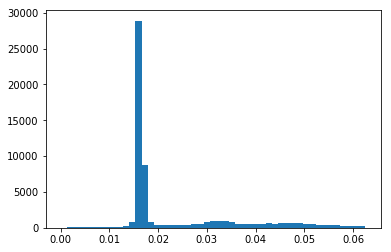

In [35]:
plt.hist(np.concatenate(df.dT_lim), bins=bins);

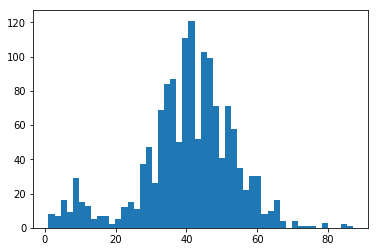

In [37]:
plt.hist(df.Nv[df.Nv>0], bins=50);

In [13]:
dblist_all[5:6]

['baseline_v1.5_10yrs.db']

### run all filter pairs for all opsims

In [11]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

In [12]:
%%time 
# run all filter pairs for all opsims 

nside = 16
# select mini survey footprint 
msname = 'WFD' # minisurvey label used to save files

if msname == 'LMC':
    ipix_ms = ipix_LMC
elif msname=='SMC':
    ipix_ms = ipix_SMC
else:
    ipix_ms = None

#sqlstr = "night<4000 and proposalId=1"
#sqlstr = None
sqlstr = "proposalId=1"
#sqlstr = "note not like '%DD%'"


magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

#--------------------------------
# empty metricArr 
#diclist = []
#for Nrun in range( len(ipix_ms) ):
#    dic = {'Nrun': Nrun, 
#                'pixId': ipix_ms[Nrun],
#                'Nv': 0,
#                'Dkl': 0,
#                'FoM_i': 0,
#                'dT_lim': []
#                  }
#    diclist.append(dic)
#arr_empty = np.array(diclist)
#df_empty = pd.DataFrame.from_records( arr_empty )
#--------------------------------


for dbname in dblist_all:
    dataRaw = {}
    dataRaw[dbname] = {}
    for fltpair in fltpairs: 
        
        print(">>> ", dbname, fltpair)

        dataRaw[dbname][fltpair] = {}
        if fltpair[0]==fltpair[1]:
            tmin =  5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            #tmin = 5/60/60/24
            tmin = 5/60/60/24  # 5s in days
            tmax = 1.5/24 # 1.5 hour in days
            #tmax = 2  # 2 days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
                
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        if len(df)==0:
            df = df_empty
            
        dataRaw[dbname][fltpair] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']] 
        
        # save raw data to pickle
        pd.DataFrame( dataRaw ).to_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))



>>>  agnddf_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 119740 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  agnddf_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 291301 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  agnddf_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter 

Found 739163 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  agnddf_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 378206 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_dust_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 109443 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_dust_v1.5_10

Found 339184 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_dust_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 696370 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_dust_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 357186 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_roll_mod2_

Found 704865 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 727535 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 333432 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_2snaps_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 375626 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_2snaps_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 712716 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_2snaps_v1.5_10yrs.db iy
Healpix slicer

>>>  baseline_samefilt_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 797384 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_samefilt_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 801584 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_samefilt_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summar

Found 405233 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 813290 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 770551 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_v1.5_

Found 467405 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_bs_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 336571 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_bs_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 675059 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_bs_v1

>>>  bulges_bulge_wfd_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 443790 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_bulge_wfd_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 462022 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_bulge_wfd_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 482292 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_bs_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 483715 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_bs_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 448746 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>

Found 419347 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_bulge_wfd_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 144676 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_bulge_wfd_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 476976 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 436681 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_i_heavy_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 401247 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_cadence_i_heavy_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 419129 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Co

Found 245016 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_i_heavy_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 433231 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bulges_i_heavy_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 436289 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  bu

>>>  daily_ddf_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 112633 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  daily_ddf_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 277112 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  daily_ddf_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constrain

Found 710346 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  daily_ddf_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 363588 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ug_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 120292 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1

>>>  dcr_nham1_ug_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 362938 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ug_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 744525 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ug_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with 

Found 769494 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ugr_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 787581 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ugr_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 363615 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_

>>>  dcr_nham1_ugri_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 407619 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ugri_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 771305 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham1_ugri_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 765377 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ug_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 784016 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ug_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 406257 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nh

>>>  dcr_nham2_ugr_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 811158 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ugr_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 769425 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ugr_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 556856 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ugri_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 404831 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dcr_nham2_ugri_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 814084 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dc

Found 529489 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  descddf_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 546926 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  descddf_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 399751 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  descddf_v1.5_10y

Found 669853 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx1_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 674092 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx1_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 689499 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx2_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 632354 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx2_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 635087 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx2_v1.5_10yrs.db gz
Healpix sli

>>>  filterdist_indx3_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 494977 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx3_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 377800 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx3_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 712196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx4_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 679250 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx4_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 693414 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx5_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460918 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx5_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 462762 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx5_v1.5_10yrs.db uz
Healpix sli

>>>  filterdist_indx6_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 117625 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx6_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 289312 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx6_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 738959 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx6_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 375440 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx7_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 190839 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx7_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 372278 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx7_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 760330 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx7_v1.5_10yrs.db yy
Healpix sli

>>>  filterdist_indx8_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 876265 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx8_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 894556 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  filterdist_indx8_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

>>>  footprint_add_mag_cloudsv1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 777466 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_add_mag_cloudsv1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 401502 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_add_mag_cloudsv1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Queryi

>>>  footprint_big_sky_dustv1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 810217 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_sky_dustv1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 768020 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_sky_dustv1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying dat

>>>  footprint_big_sky_nouiyv1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 593342 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_sky_nouiyv1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 432616 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_sky_nouiyv1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying 

>>>  footprint_big_skyv1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 607748 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_skyv1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 563386 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_skyv1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 183027 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_wfdv1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 611560 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_big_wfdv1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 614211 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_bluer_footprintv1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 417674 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_bluer_footprintv1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 346369 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_bluer_footprintv1.5

Found 489848 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_gp_smoothv1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 491580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_gp_smoothv1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 451873 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newAv1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 232848 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newAv1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 422208 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newAv1.5_10yrs.db ui
Healpix slicer using

Found 300401 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newBv1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 102748 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newBv1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 250372 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  foot

>>>  footprint_newBv1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 637690 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_newBv1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 327432 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_no_gp_northv1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllP

>>>  footprint_no_gp_northv1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 794939 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_no_gp_northv1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 366902 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_no_gp_northv1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying databa

>>>  footprint_standard_goalsv1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 407824 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_standard_goalsv1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 772890 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_standard_goalsv1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Queryi

>>>  footprint_stuck_rollingv1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 778454 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_stuck_rollingv1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 798999 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_stuck_rollingv1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying 

Found 404972 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gi_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 813550 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gi_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 769153 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  good

>>>  goodseeing_gri_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 553981 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gri_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 405252 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gri_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 578704 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_griz_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 537177 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_griz_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 553026 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  

>>>  goodseeing_gz_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 577239 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gz_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 579138 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_gz_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 498792 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_i_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 172182 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodseeing_i_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 577303 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  goodse

>>>  greedy_footprint_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 479580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  greedy_footprint_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 502058 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  greedy_footprint_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 480436 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  roll_mod2_dust_sdf_0.20_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 483810 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  roll_mod2_dust_sdf_0.20_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 446043 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.


Found 120403 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.10_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 297738 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.10_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 521046 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 746543 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.10_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 383484 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.20_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 120922 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 786494 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.20_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 362010 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod2_sdf_0.20_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 745386 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 405735 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod3_sdf_0.10_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 769700 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod3_sdf_0.10_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 794700 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 763462 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod3_sdf_0.20_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 788147 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod3_sdf_0.20_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 405084 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 402684 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod6_sdf_0.10_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 810630 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod6_sdf_0.10_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 768294 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 541791 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod6_sdf_0.20_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 577696 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_mod6_sdf_0.20_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 401107 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Comp

Found 658510 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_2ns_1expt_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 661363 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_2ns_1expt_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 612039 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 562553 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_2ns_5expt_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 193430 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_2ns_5expt_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 647989 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 695395 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_5ns_1expt_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 638101 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_5ns_1expt_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 657352 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 378943 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_5ns_5expt_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 670301 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  short_exp_5ns_5expt_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 674507 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 480203 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  spiders_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 117962 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  spiders_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 291119 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  spiders_v1.5_10y

Found 750325 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  spiders_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 384038 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt120v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 117523 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs

>>>  third_obs_pt120v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 369385 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt120v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 755416 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt120v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 773375 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt15v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 790566 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt15v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 365318 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  thir

>>>  third_obs_pt30v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 408046 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt30v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 773415 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt30v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 771353 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt45v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 789872 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt45v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 407869 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  thir

>>>  third_obs_pt60v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 814994 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt60v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 772229 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt60v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 558863 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt90v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 407460 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  third_obs_pt90v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 817682 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  thir

>>>  twilight_neo_mod1_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 696672 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod1_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 701545 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod1_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summar

Found 671686 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod2_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 672146 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod2_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 622987 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod3_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 186634 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod3_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 641974 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod3_v1.5_10yrs.db gi
Healpix 

>>>  twilight_neo_mod4_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 520897 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod4_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 535565 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twilight_neo_mod4_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summar

Found 457665 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u60_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460634 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u60_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 420328 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u60_v1.5_10yrs.db uy
Hea

Found 277851 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  var_expt_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 495846 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  var_expt_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 499117 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  var_expt_v1.5_

Found 104901 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_noddf_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 254471 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_noddf_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 449086 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 638192 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_noddf_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 327960 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 101540 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Co

Found 643386 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 296124 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.65_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 609951 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 361315 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.70_noddf_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 684383 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.70_noddf_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 702397 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 649571 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.70_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 667292 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.70_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 343652 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 374718 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.75_noddf_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 751316 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.75_noddf_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 711785 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 476773 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.75_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 493912 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.75_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 356808 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 560911 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.80_noddf_v1.5_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 563177 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.80_noddf_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 522326 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 466184 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.80_v1.5_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 160647 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.80_v1.5_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 533386 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 533113 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.85_noddf_v1.5_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 489320 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.85_noddf_v1.5_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 507950 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 283154 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.85_v1.5_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 504969 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.85_v1.5_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 507422 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 369222 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_noddf_v1.5_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 124143 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_noddf_v1.5_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 306920 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 383616 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_noddf_v1.5_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 785241 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_noddf_v1.5_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 401625 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 774641 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_v1.5_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 792679 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.90_v1.5_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 365920 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 864101 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.95_noddf_v1.5_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 447837 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.95_noddf_v1.5_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 848013 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 850725 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.95_v1.5_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 806107 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.95_v1.5_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 823564 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

Found 626733 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.99_noddf_v1.5_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 461740 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.99_noddf_v1.5_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 925902 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statisti

Found 625781 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.99_v1.5_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 579121 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  wfd_depth_scale0.99_v1.5_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 596290 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Complete

In [21]:
%%time 
# run all filter pairs for all opsims 

nside = 16
# select mini survey footprint 
msname = 'WFD' # minisurvey label used to save files

if msname == 'LMC':
    ipix_ms = ipix_LMC
elif msname=='SMC':
    ipix_ms = ipix_SMC
else:
    ipix_ms = None

#sqlstr = "night<4000 and proposalId=1"
#sqlstr = None
sqlstr = "proposalId=1"
#sqlstr = "note not like '%DD%'"


magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

#--------------------------------
# empty metricArr 
#diclist = []
#for Nrun in range( len(ipix_ms) ):
#    dic = {'Nrun': Nrun, 
#                'pixId': ipix_ms[Nrun],
#                'Nv': 0,
#                'Dkl': 0,
#                'FoM_i': 0,
#                'dT_lim': []
#                  }
#    diclist.append(dic)
#arr_empty = np.array(diclist)
#df_empty = pd.DataFrame.from_records( arr_empty )
#--------------------------------

dbpath = dbpath_v17
for dbname in dblist_all_v17:
    dataRaw = {}
    dataRaw[dbname] = {}
    for fltpair in fltpairs: 
        
        print(">>> ", dbname, fltpair)

        dataRaw[dbname][fltpair] = {}
        if fltpair[0]==fltpair[1]:
            tmin =  5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            #tmin = 5/60/60/24
            tmin = 5/60/60/24  # 5s in days
            tmax = 1.5/24 # 1.5 hour in days
            #tmax = 2  # 2 days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
                
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        if len(df)==0:
            df = df_empty
            
        #dataRaw[dbname][fltpair] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']] 
        dataRaw[dbname][fltpair] = df[['pixId', 'Nv', 'dT_lim']] 

        # save raw data to pickle
        pd.DataFrame( dataRaw ).to_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))




>>>  baseline_nexp1_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 116848 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp1_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 287391 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp1_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 745038 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp1_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 381035 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp2_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 108080 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ba

>>>  baseline_nexp2_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 335877 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp2_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 688761 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  baseline_nexp2_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

>>>  cadence_drive_gl100_gcbv1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 700013 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl100_gcbv1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 715491 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl100_gcbv1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying 

>>>  cadence_drive_gl100v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 719213 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl100v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 367993 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl100v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Sum

>>>  cadence_drive_gl200_gcbv1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 736233 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl200_gcbv1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 698896 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl200_gcbv1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying 

>>>  cadence_drive_gl200v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 562088 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl200v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 376103 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl200v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Sum

>>>  cadence_drive_gl30_gcbv1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 532934 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl30_gcbv1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 493541 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl30_gcbv1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying dat

>>>  cadence_drive_gl30v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 158541 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl30v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 530919 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  cadence_drive_gl30v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database Summar

Found 444074 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.00_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460831 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.00_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 157065 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dd

>>>  ddf_dither0.05_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 482745 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.05_v1.7_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 444006 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.05_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 266328 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.10_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 481615 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.10_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 482594 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dd

>>>  ddf_dither0.30_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 108507 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.30_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 265978 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.30_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 688234 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.30_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 352677 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.70_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 108080 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dd

>>>  ddf_dither0.70_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 335877 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.70_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 688761 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither0.70_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 709789 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither1.00_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 726924 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither1.00_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 335474 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dd

>>>  ddf_dither1.50_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 374095 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither1.50_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 709672 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither1.50_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 708024 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither2.00_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 724558 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  ddf_dither2.00_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 374348 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  dd

>>>  euclid_dither1_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 746667 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither1_v1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 707952 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither1_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 509169 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither2_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 372653 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither2_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 747134 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  eu

>>>  euclid_dither3_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 492256 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither3_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 509364 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither3_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 529805 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither4_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 531513 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither4_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 491978 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  eu

>>>  euclid_dither5_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 157047 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither5_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 529530 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  euclid_dither5_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps

Found 402268 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_0_v1.710yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 416640 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_0_v1.710yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 141862 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 441938 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_1_v1.710yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 406397 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_1_v1.710yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 421297 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 439343 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_2_v1.710yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 441298 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_2_v1.710yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 405973 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 239416 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_3_v1.710yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 434418 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_3_v1.710yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 436702 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 93580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_4_v1.710yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 233146 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_4_v1.710yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 420899 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_4

Found 304894 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_5_v1.710yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 97844 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_5_v1.710yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 239416 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_5

Found 620221 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_5_v1.710yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 317079 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_6_v1.710yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 97835 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_6

Found 302273 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_6_v1.710yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 619597 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_6_v1.710yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 317324 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 675022 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_7_v1.710yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 312014 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_7_v1.710yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 639085 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

Found 683740 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_8_v1.710yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 703893 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_8_v1.710yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 323040 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  footprint_

>>>  pair_times_11_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 356429 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_11_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 676114 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_11_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 707952 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_22_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 724959 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_22_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 374592 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair

>>>  pair_times_33_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 758213 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_33_v1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 718349 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_33_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 520101 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_44_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 380610 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_44_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 762487 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair

>>>  pair_times_55_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 506575 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_55_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 522886 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  pair_times_55_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps wi

Found 527993 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.2_nslice2_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 528936 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.2_nslice2_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 490952 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 459392 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.2_nslice3_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 156553 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.2_nslice3_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 527256 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 480649 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.4_nslice2_v1.7_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 442706 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.4_nslice2_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460283 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 264633 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.4_nslice3_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 479383 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.4_nslice3_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 481208 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 351953 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice2_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 108085 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice2_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 264966 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 334787 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice2_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 686396 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice2_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 351609 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 708096 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice3_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 725750 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.6_nslice3_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 334898 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 723299 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.8_nslice2_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 373771 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.8_nslice2_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 708888 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 744916 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.8_nslice3_v1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 706823 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.8_nslice3_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 724095 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 509655 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.9_nslice2_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 372169 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.9_nslice2_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 745642 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 530943 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.9_nslice3_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 492490 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale0.9_nslice3_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 509270 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 157082 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale1.0_nslice2_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 528870 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale1.0_nslice2_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 530419 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 443512 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale1.0_nslice3_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460773 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_nm_scale1.0_nslice3_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 157878 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary stat

Found 478352 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.2_nslice2_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 480333 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.2_nslice2_v1.7_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 442079 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 107158 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.2_nslice3_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 263122 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.2_nslice3_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 478966 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 688645 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.2_nslice3_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 353371 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.4_nslice2_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 107719 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 727878 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.4_nslice2_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 335188 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.4_nslice2_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 689146 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 373573 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.4_nslice3_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 708330 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.4_nslice3_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 727555 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 707411 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.6_nslice2_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 726426 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.6_nslice2_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 373841 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 371718 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.6_nslice3_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 745506 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.6_nslice3_v1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 707387 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 492932 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.8_nslice2_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 510946 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.8_nslice2_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 371836 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 529109 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.8_nslice3_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 531316 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.8_nslice3_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 492675 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 461658 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.9_nslice2_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 156640 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.9_nslice2_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 529096 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 481795 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.9_nslice3_v1.7_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 443198 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale0.9_nslice3_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 461695 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 263775 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice2_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 479881 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice2_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 481860 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 354476 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice3_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 107339 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice3_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 264390 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Found 336332 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice3_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 690467 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  rolling_scale1.0_nslice3_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 354135 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern1_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 630217 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern1_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 288895 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern1_v1.7_10yrs.db zy
Healpix sli

>>>  twi_neo_pattern2_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 348988 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern2_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 661495 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern2_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 675918 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern3_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 692819 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern3_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 357376 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern4_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 722623 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern4_v1.7_10yrs.db rz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 685101 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern4_v1.7_10yrs.db ry
Healpix sli

>>>  twi_neo_pattern5_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 474953 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern5_v1.7_10yrs.db rr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 345955 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern5_v1.7_10yrs.db ri
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAl

Found 500039 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern6_v1.7_10yrs.db gz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 463076 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern6_v1.7_10yrs.db gy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 478780 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern7_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 504975 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern7_v1.7_10yrs.db gi
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 507039 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_neo_pattern7_v1.7_10yrs.db gz
Healpix sli

>>>  twi_pairs_mixed_repeat_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 460306 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_mixed_repeat_v1.7_10yrs.db gg
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("g", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 155580 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_mixed_repeat_v1.7_10yrs.db gr
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying 

>>>  twi_pairs_mixed_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 484900 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_mixed_v1.7_10yrs.db uz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 439637 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_mixed_v1.7_10yrs.db uy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllPr

Found 262781 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_repeat_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "r") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 482124 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_repeat_v1.7_10yrs.db ui
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 483496 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 106859 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_v1.7_10yrs.db ug
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 262673 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_v1.7_10yrs.db ur
Healpix slicer using NSIDE=16, a

Found 692799 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  twi_pairs_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("y", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 354696 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_30_v1.7_10yrs.db uu
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 113459 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms

>>>  u_long_ms_30_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 340713 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_30_v1.7_10yrs.db zy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 697265 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_30_v1.7_10yrs.db yy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with 

Found 710732 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_40_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 726944 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_40_v1.7_10yrs.db zz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 335872 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long

>>>  u_long_ms_50_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 368550 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_50_v1.7_10yrs.db iz
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "z") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 699387 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_50_v1.7_10yrs.db iy
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with 

Found 689032 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_60_v1.7_10yrs.db ry
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("r", "y") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 704685 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long_ms_60_v1.7_10yrs.db ii
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("i", "i") and proposalId=1 for columns ['filter', 'fieldDec', 'fiveSigmaDepth', 'fieldRA', 'observationStartMJD']
Found 363958 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>>  u_long

### load data

In [14]:
# get the median of N visits for each filter pair
dataRaw = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_baseline_wfd_2d.pkl',)

Nvth = {}
for fltpair in fltpairs: 
    df = dataRaw[fltpair]['baseline_v1.5_10yrs.db']
    Nvth[fltpair] = np.median( df.Nv ) 



In [15]:
Nvth

{'uu': 1770.0,
 'ug': 74.0,
 'ur': 84.0,
 'ui': 28.0,
 'uz': 3.0,
 'uy': 0.0,
 'gg': 3828.0,
 'gr': 141.0,
 'gi': 52.0,
 'gz': 15.0,
 'gy': 6.0,
 'rr': 21384.0,
 'ri': 208.0,
 'rz': 47.0,
 'ry': 24.0,
 'ii': 21690.0,
 'iz': 220.0,
 'iy': 107.0,
 'zz': 17310.5,
 'zy': 251.0,
 'yy': 18998.0}

### run for one opsim without proposal info

In [39]:
%%time 

# run for one opsim only

dicFoMtGaps = {}
dicNfields = {}
dicNstar = {}

dicFoM = {}
#dicFoM['db'] = dblist_all[4:5]
dicFoM['db'] = ['footprint_big_wfdv1.5_10yrs.db',]

nside = 16
# select mini survey footprint 
ipix_ms = None
sqlstr = 'night<4000 and note not like "%DD%" '
magdic = {'u':18, 'g':18, 'r':18, 'i':18, 'z':18, 'y':18}

dataRaw = {}  # save the raw metricValues.data for each opsim each fltpair; dataRaw[fltpair][dbname]

for fltpair in fltpairs:     
    dicFoMtGaps[fltpair] = []
    dicNfields[fltpair] = []
    dicNstar[fltpair] = []
    
    dataRaw[fltpair] = {}
    for dbname in dicFoM['db']: 
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
        else:
            tmin = 5/60/60/24
            tmax = 1.5/24 # 1.5 hour in days
            bins = np.linspace(tmin, tmax, 50)
            
        metricSky = runMetric(dbname, fltpair=fltpair, sqlstr=sqlstr, nside=nside, ipix_ms=ipix_ms, 
                                 mag_lim=[magdic[fltpair[0]], magdic[fltpair[1]]],
                                 tmin=tmin, tmax=tmax, bins=bins,
                                 filename=None, save_dT=True, dataout=True );
            
        arr = metricSky.metricValues.data 
        
        df = pd.DataFrame.from_records( arr[ arr != None ] )
        
        # count number of fields/stars above threshold 
        df['starDensity'] = starDens[ df['pixId'].values ] 
        idx = df['Nv'] > Nvth[fltpair]
        Nfields = df['Nv'][idx].shape[0]
        Nstar = np.sum( df['starDensity'][idx] )

        FoM_tgaps = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
                
        dicFoMtGaps[fltpair].append (FoM_tgaps)
        dicNfields[fltpair].append(Nfields)
        dicNstar[fltpair].append(Nstar)
        
        dataRaw[fltpair][dbname] = df[['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']]  
        
        print('>>>', fltpair, dbname, FoM_tgaps, Nfields, Nstar)
    
    df_fom = pd.DataFrame(dicFoMtGaps)
    df_fom.to_csv('df_tgapsFoM_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNfields)
    df_fom.to_csv('df_Nfields_{}.csv'.format(dbname), index=False)
    
    df_fom = pd.DataFrame(dicNstar)
    df_fom.to_csv('df_Nstars_{}.csv'.format(dbname), index=False)
    
    # save raw data to pickle
    pd.DataFrame( dataRaw ).to_pickle(outDir+'/tgaps_dataRaw_{}.pkl'.format(dbname),)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "u") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 146196 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> uu footprint_big_wfdv1.5_10yrs.db 14307.928923071027 57 4547880
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("u", "g") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 352556 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> ug footprint_big_wfdv1.5_10yrs.db 9048.751206724719 232 35469756
Healpix slicer using NSIDE=16, appr

Found 900195 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> iy footprint_big_wfdv1.5_10yrs.db 18835.126872703975 467 34380792
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "z") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 415701 visits
Running:  ['newMetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
>>> zz footprint_big_wfdv1.5_10yrs.db 71683.31829812122 0 0
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint filter in ("z", "y") and night<4000 and note not like "%DD%"  for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 852405 visits
Running:  ['newMetricS

In [43]:
ls *.csv

df_Nfields_footprint_big_wfdv1.5_10yrs.db.csv
df_Nfields_wfd_v1.5.csv
df_Nstars_footprint_big_wfdv1.5_10yrs.db.csv
df_Nstars_wfd_v1.5.csv
df_tgapsFoM_footprint_big_wfdv1.5_10yrs.db.csv
df_tgapsFoM_wfd_v1.5.csv
tgapsFoM_WFD_v1.5.csv
tgaps_FoM_baseline_v1.5_10yrs.db.csv
tgaps_FoM_baseline_v1.5_GP.csv
tgaps_FoM_baseline_v1.5_LMC.csv
tgaps_FoM_baseline_v1.5_SMC.csv


In [44]:
# add footprint_big to dataframe 
for fomstr in ['tgapsFoM', 'Nstars', 'Nfields']:
    df_Nstar_fbig = pd.read_csv('df_{}_footprint_big_wfdv1.5_10yrs.db.csv'.format(fomstr))
    df_Nstar_fbig['db'] = 'footprint_big_wfdv1.5_10yrs.db'
    
    fomcsv = 'df_{}_wfd_v1.5.csv'.format(fomstr)
    df_fom = pd.read_csv(fomcsv)
    df_fom['db'] = dblist_all
    
    idx = int( np.where( df_fom['db']=='footprint_big_wfdv1.5_10yrs.db' )[0] )
    df_fom.loc[idx ] = df_Nstar_fbig.loc[0]
    
    df_fom.to_csv('{}_WFD_v1.5.csv'.format(fomstr), index=False)
    

In [81]:
df_fom.loc[31]

uu                           24106.8
ug                           19359.5
ur                           52384.2
ui                             31642
uz                               NaN
uy                           1754.14
gg                           49977.5
gr                           71343.2
gi                           43684.1
gz                           25322.7
gy                             53788
rr                            165469
ri                            102243
rz                           85194.3
ry                            117094
ii                            142661
iz                           75959.2
iy                            153248
zz                            103447
zy                            126912
yy                            137697
db    footprint_big_wfdv1.5_10yrs.db
Name: 31, dtype: object

In [10]:
outDir

'/home/idies/workspace/Temporary/lixl/scratch/outDir'

In [12]:
dblist_all[4]

'baseline_v1.5_10yrs.db'

In [10]:

#df_baseline = pd.DataFrame( dataRaw )
df_baseline = pd.read_pickle(outDir+'/tgaps_dataRaw_baseline_v1.5_10yrs.db.pkl')
df_baseline

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
baseline_v1.5_10yrs.db,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv dT_lim 0 1376...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv ...,...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...,pixId Dkl FoM_i Nv \ 0 ...


In [135]:
dT = np.concatenate( df_baseline['uu']['baseline_v1.5_10yrs.db'] ['dT_lim'].values )


In [138]:
np.concatenate(dT).shape

(2468080,)

In [136]:
dT.shape

(1459,)

In [11]:

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60/24
tmax = 1.5/24 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


In [14]:
# prepare filter_dict
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    dT = np.concatenate( df_baseline[fltpair]['baseline_v1.5_10yrs.db'] ['dT_lim'].values )
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        bins = bins_lin
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

uu 2468080 5.398810362201651
ug 70578 2.1134440233740857
ur 66368 1.375961964396934
ui 9339 0.5016790761842163
uz 0 nan
uy 50 6.081792190269123
gg 5330741 5.312331831053857
gr 127608 1.6617405390844637
gi 24946 1.171693868930305
gz 987 0.43786301783702203
gy 494 0.61516906181712
rr 29186938 5.787795755226195
ri 180466 1.727938366489182
rz 14403 0.9063908925784445
ry 2043 0.40171911859405973
ii 29609453 6.215477775914526
iz 206627 1.8262000625825658
iy 38139 0.7669018018944066
zz 23694537 6.00344538601065
zy 174632 1.3822756018255706
yy 26094240 5.950768567363721


uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


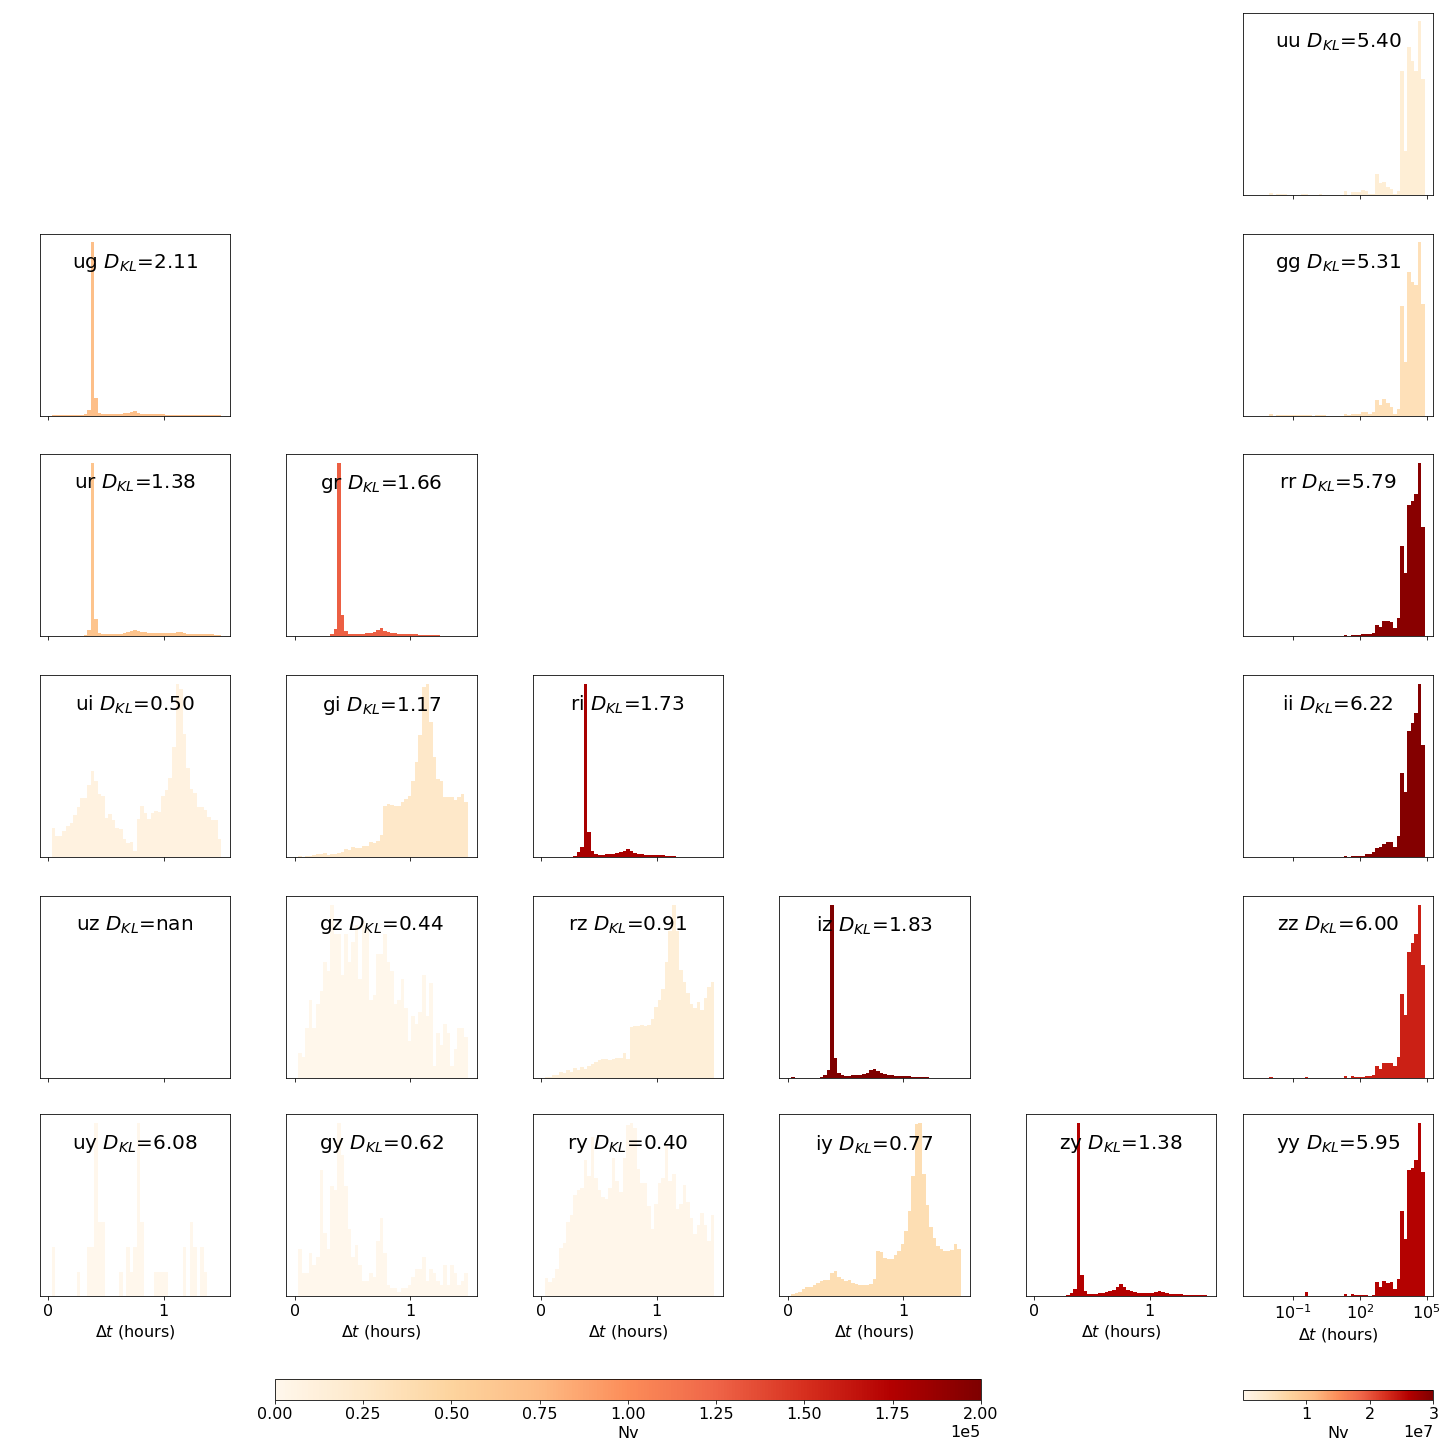

In [17]:

tmin = 5/60/60 # in hour
tmax = 3e8/60./60.   
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60
tmax = 1.5 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log, bins_lin], 
                   cumulative=False, density=False, histtype='stepfilled')


In [28]:
filter_dict['gg']['dT']

array([ 356.00360217, 1109.83084951,  753.82724734, ..., 2187.98940173,
       2544.03327195,  745.98921647])

Text(0, 0.5, 'Nv (M)')

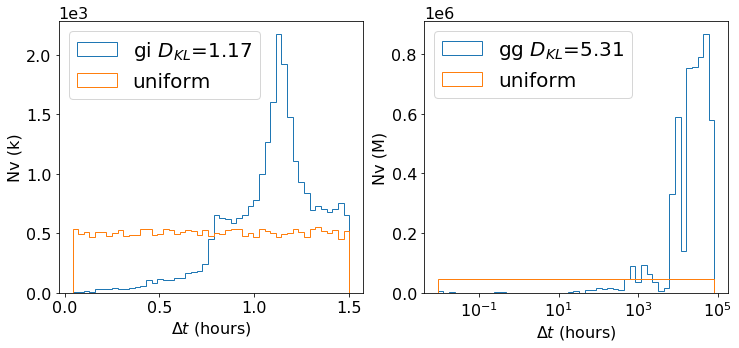

In [16]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

bins_lin = np.linspace(dT.min(), dT.max(), 50)

ax = axs[0]
_ = ax.hist(dT, bins=bins_lin, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_lin, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)

In [15]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*24, bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale("log")
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*24, bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        axs[5, i].set_xlabel('$\Delta t$ (hours)')
          
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label('Nv')
    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()

    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label('Nv')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )



#### utils

In [1]:
# coordinates transform
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec
    